In [84]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import graphviz
from sklearn.tree import export_graphviz
from IPython.display import SVG, display

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score

import matplotlib.pyplot as plt

In [40]:
data_grades = pd.read_csv("grades.csv")
data_grades

,PUPIL_SEX,PUPIL_CLASS,TEACHER_RIGHT,TEACHER_CHK,TEACHER_QUEST,TEACHER_CORR,PUPIL_CORR,PUPIL_STRIP,GRADE
0,F,8A,65,0,4,2,1,6,4-
1,F,8A,70,4,0,4,0,4,3
2,F,8A,85,0,0,4,3,5,4
3,M,8A,55,0,0,1,8,3,3
4,M,8A,40,1,2,0,3,4,2
...,...,...,...,...,...,...,...,...,...
67,F,8A,80,1,0,2,1,7,4-
68,F,8A,85,0,0,1,2,2,4
69,F,8A,90,0,0,0,1,1,4
70,F,8A,95,0,0,3,1,2,5-


In [41]:
# кодируем строки, переводя их в числа, т.к. классификация не принимает строки
for i in data_grades.columns:
    data_grades[i] = LabelEncoder().fit_transform(data_grades[i])

In [42]:
X = data_grades[data_grades.columns[:-1]]
y = data_grades['GRADE']

# Grades

### Дерево решений на 100% данных

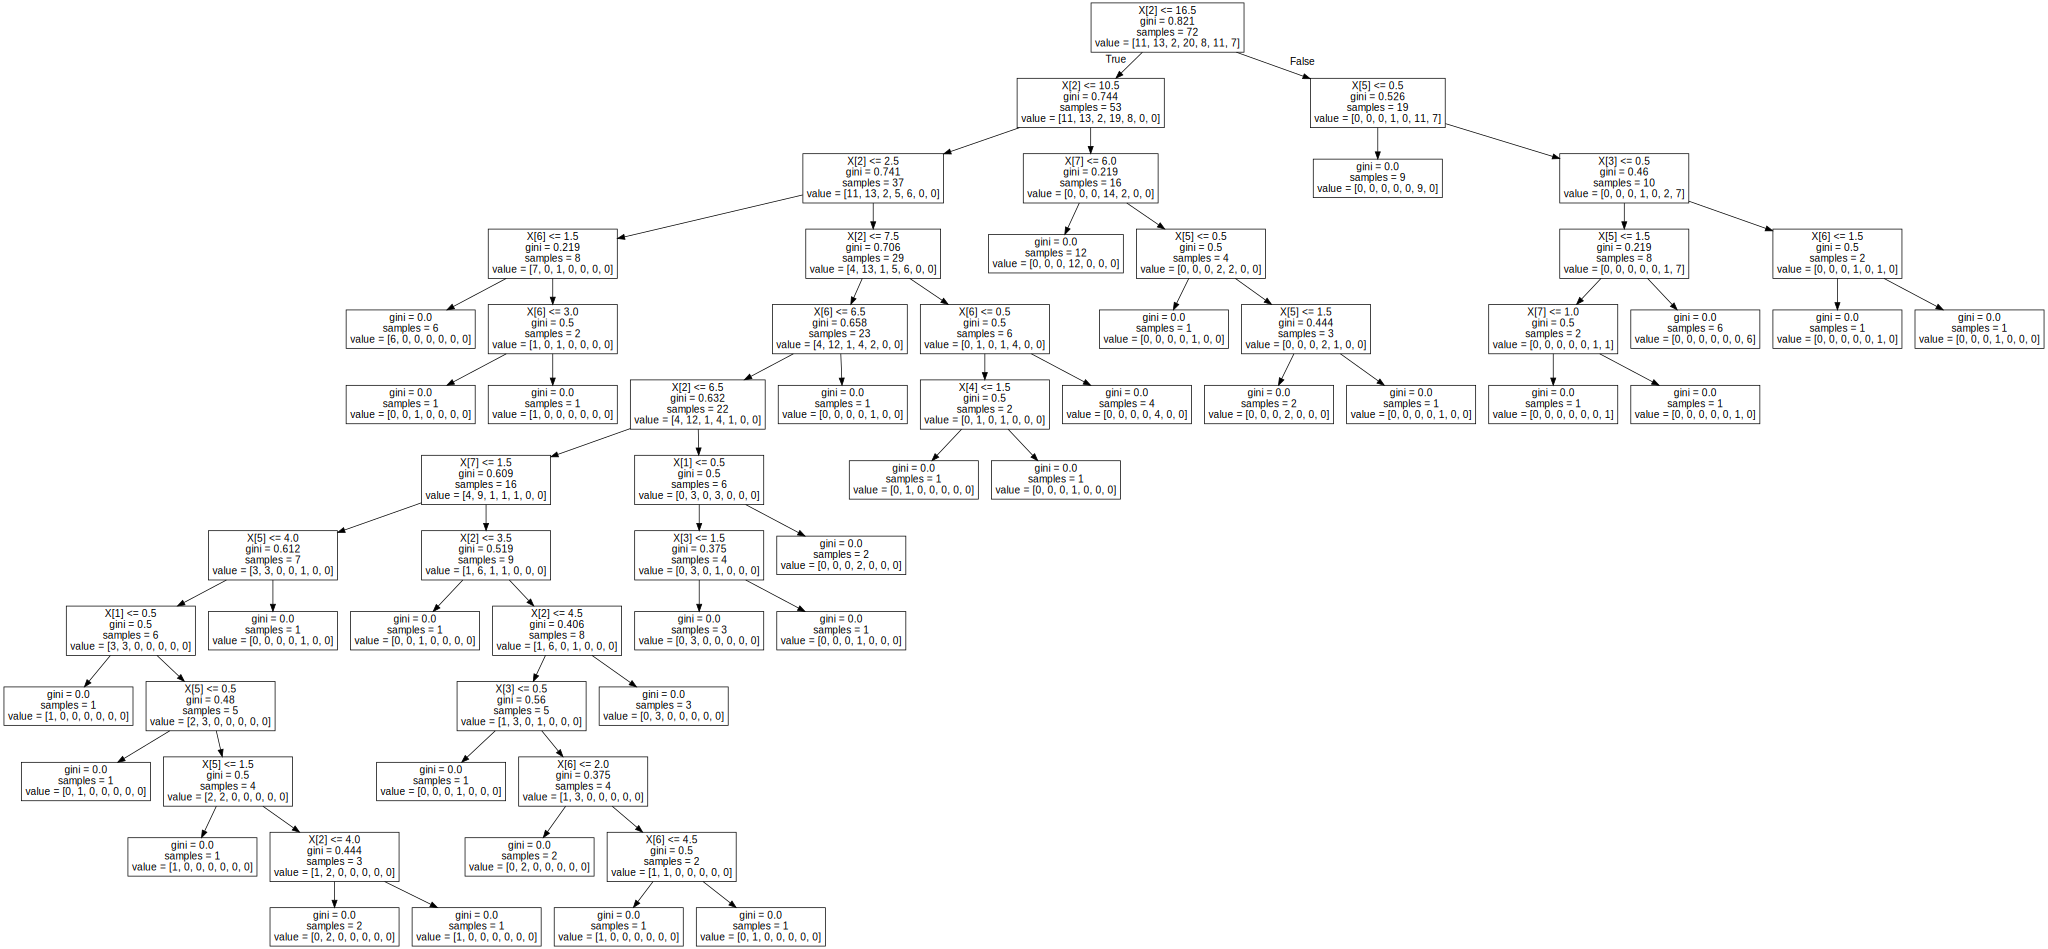

In [72]:
# создаем модель. random_state фиксируем для того, чтобы можно было получить те же значения в будущем, при повторном обучении
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X, y)

#отображение дерева решений
display(graphviz.Source(export_graphviz(tree, out_file=None)))

### Дерево решений information gain

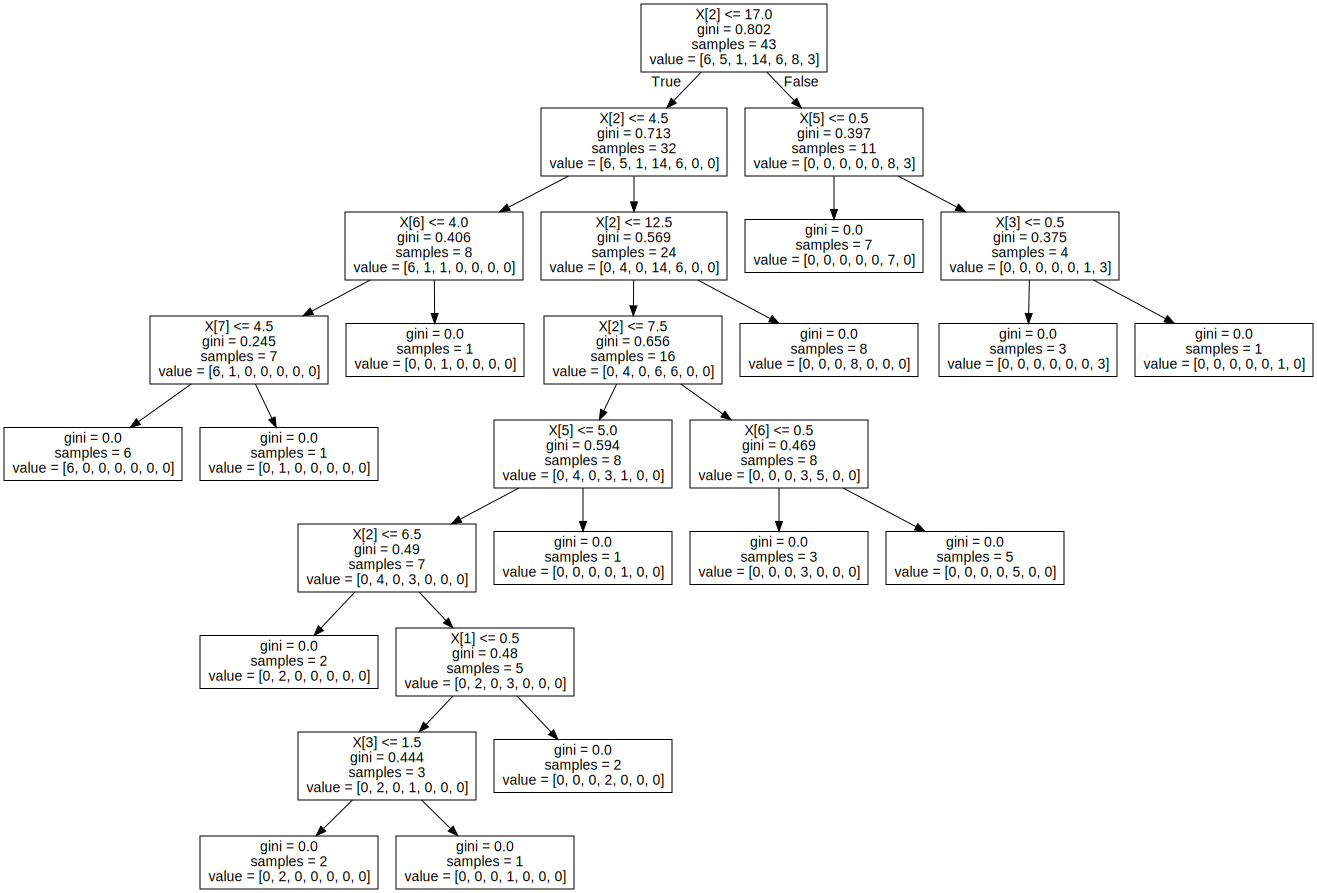

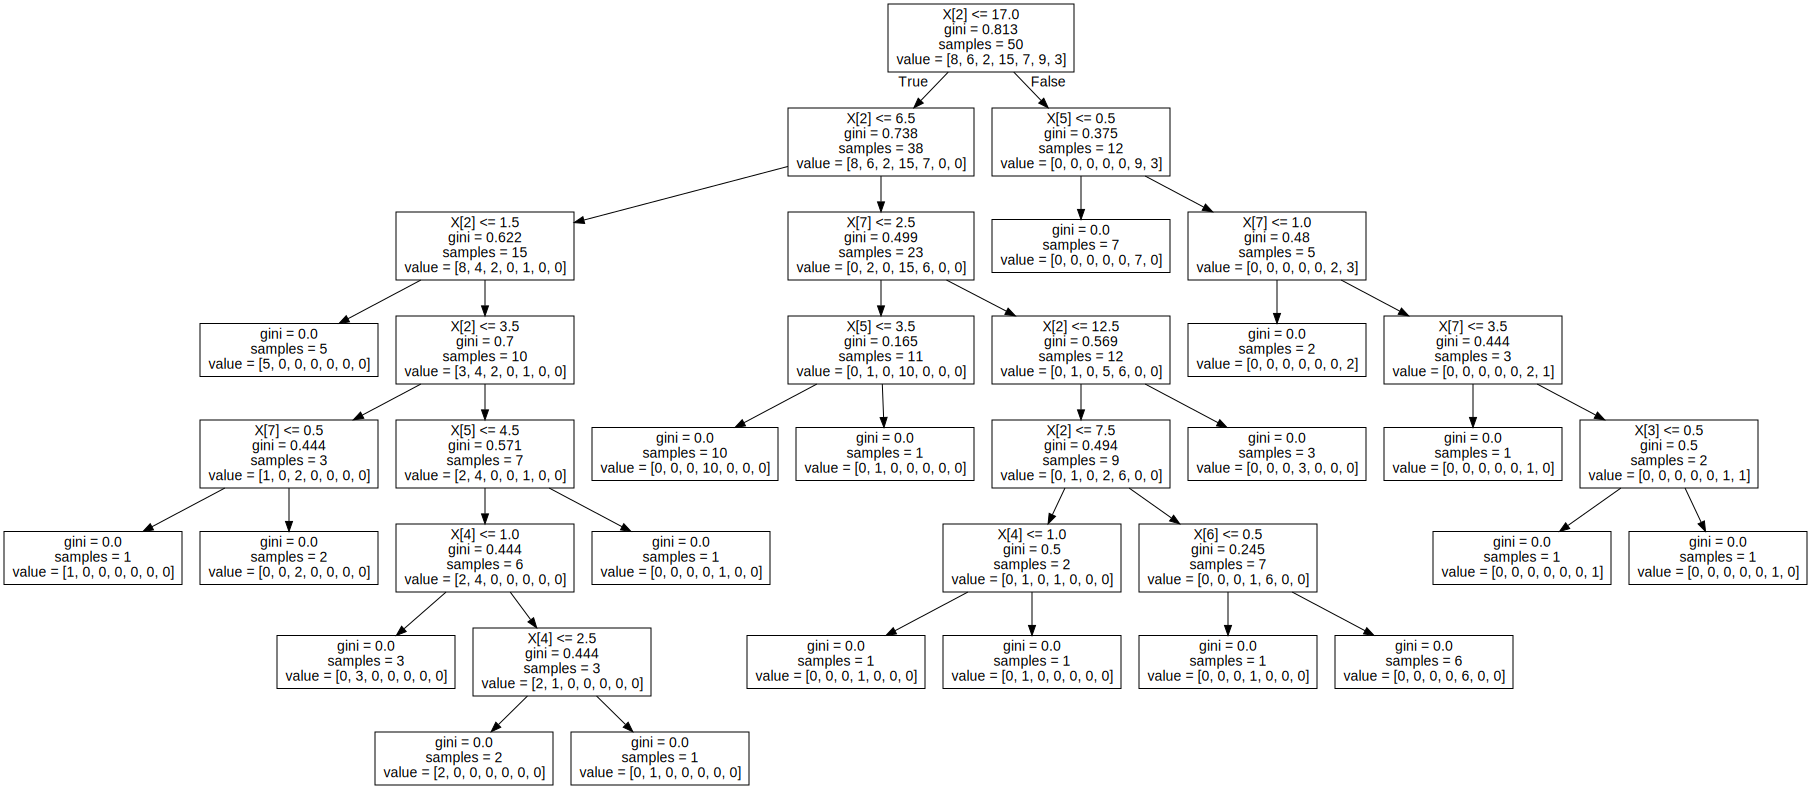

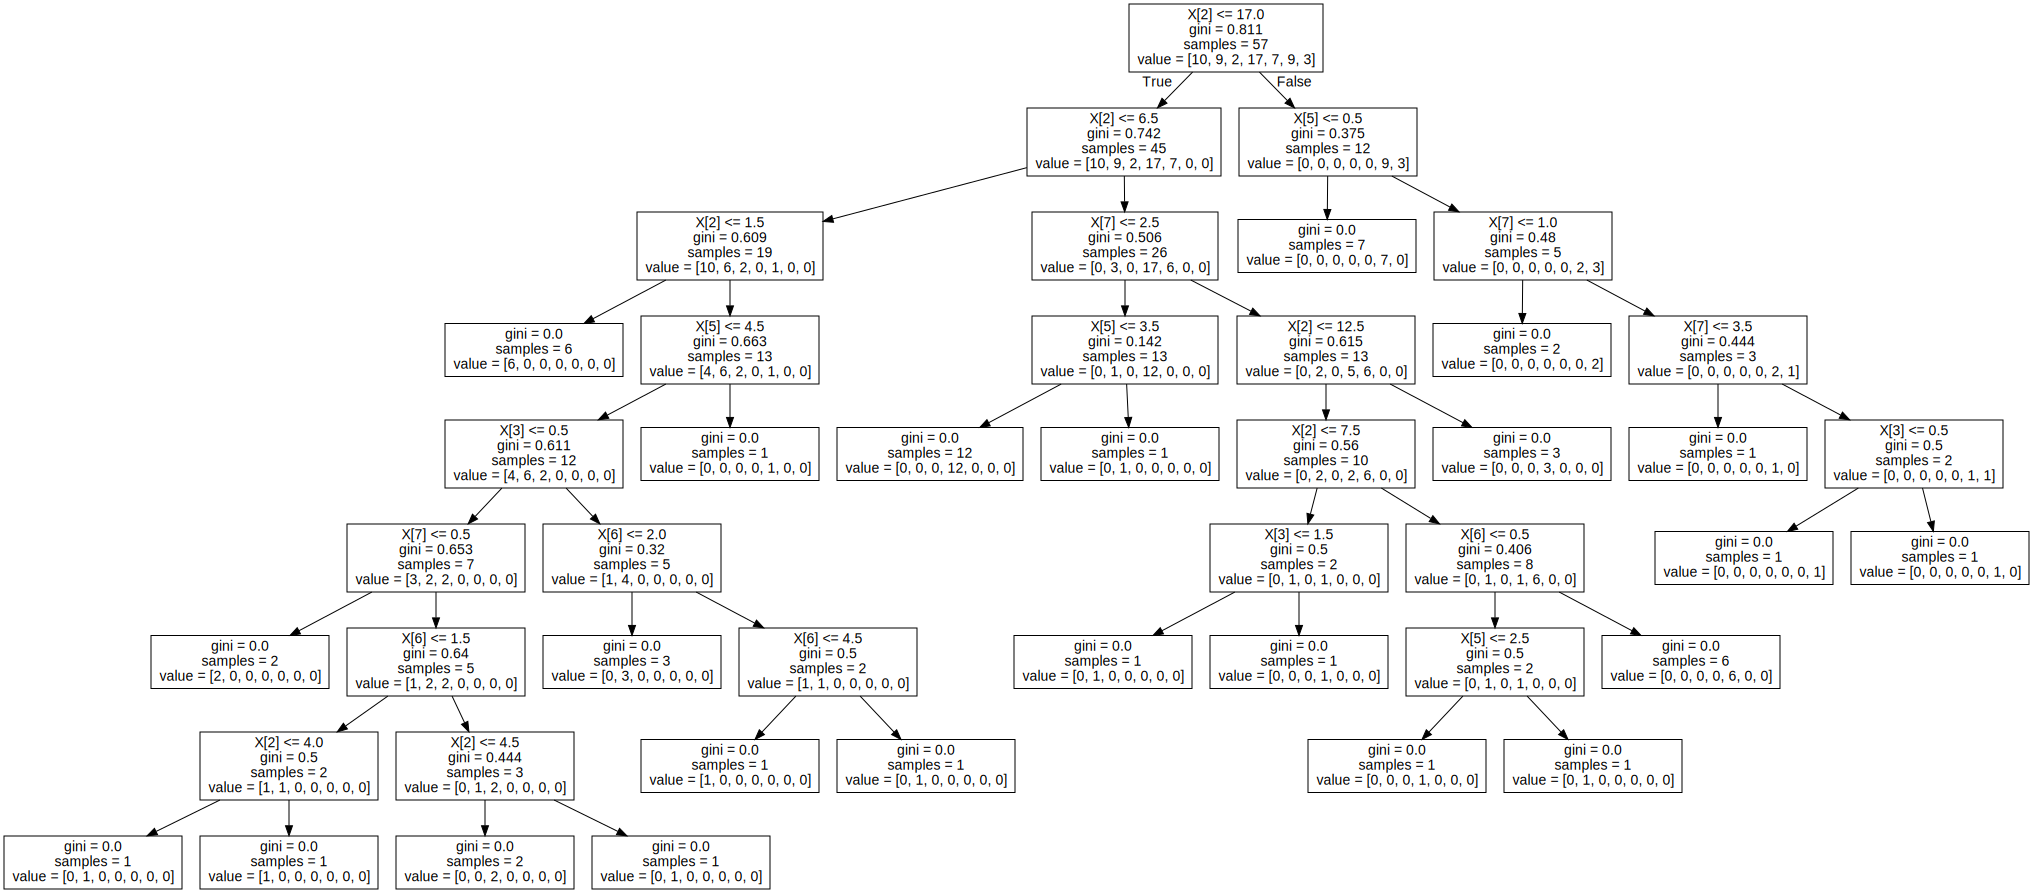

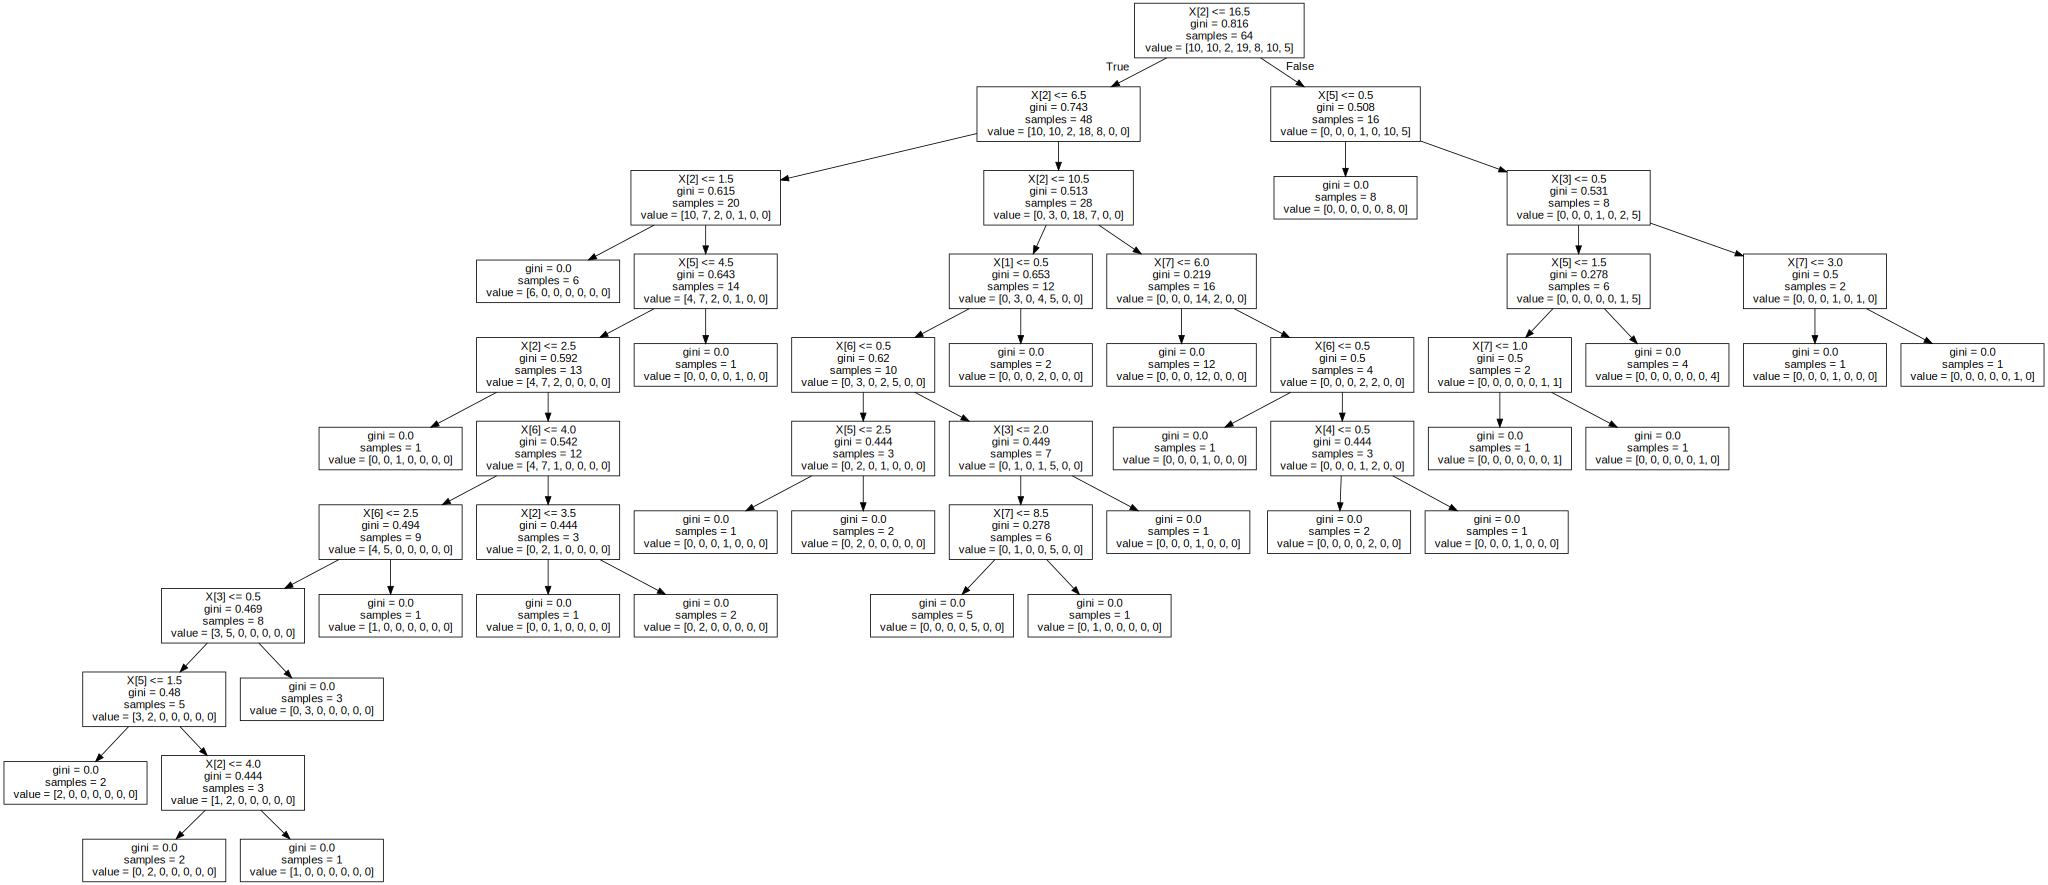

In [73]:
accuracy_tree = []
precision_tree = []
f1_tree = []
recall_tree = []
x = range(60, 91, 10)

for i in x:
    #разбиваем датасет на обучающую/тестовую выборку на 60/40, 70/30, 80/20, 90/10
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=(100-i)/100, random_state=123)

    #создаем модель и обучаем ее
    tree = DecisionTreeClassifier(random_state=0)
    tree.fit(X_train, y_train)

    #фиксируем ожидаемые значения. Те, что реально есть в датасете
    expected = y_test
    #классифицируем тестовую выборку и получаем значения, которые дальше будем сравнивать с ожидаемыми
    predicted = tree.predict(X_test)
    
    #заполнение массивов оценок
    accuracy_tree.append(accuracy_score(expected, predicted))
    precision_tree.append(precision_score(expected, predicted, zero_division = 1, average='macro'))
    f1_tree.append(f1_score(expected, predicted, zero_division = 1, average='macro'))
    recall_tree.append(recall_score(expected, predicted, zero_division = 1, average='macro'))
    
    display(graphviz.Source(export_graphviz(tree, out_file=None)))

In [109]:
print('accuracy = '+str(accuracy_tree))
print('precision = '+str(precision_tree))
print('f1 = '+str(f1_tree))
print('recall = '+str(recall_tree))

accuracy = [0.41379310344827586, 0.36363636363636365, 0.4666666666666667, 0.5]
precision = [0.40192743764172334, 0.3273809523809524, 0.4523809523809524, 0.6428571428571429]
f1 = [0.37864992150706434, 0.30040118611547184, 0.3102040816326531, 0.34285714285714286]
recall = [0.4178571428571428, 0.4751700680272109, 0.4642857142857143, 0.619047619047619]


Text(0.5, 0, 'Обучающий набор, %')

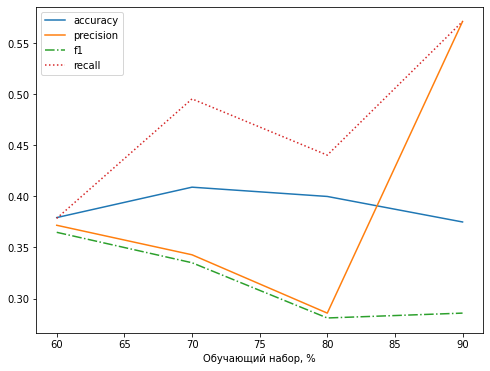

In [75]:
fig, ax = plt.subplots(figsize=(8, 6))

#отображение графиков
ax.plot(x, accuracy_tree, label = 'accuracy')
ax.plot(x, precision_tree, label = 'precision', linestyle='-')
ax.plot(x, f1_tree, label = 'f1', linestyle='-.')
ax.plot(x, recall_tree, label = 'recall', linestyle=':')
ax.legend()
ax.set_xlabel('Обучающий набор, %')


### Дерево решений index gini

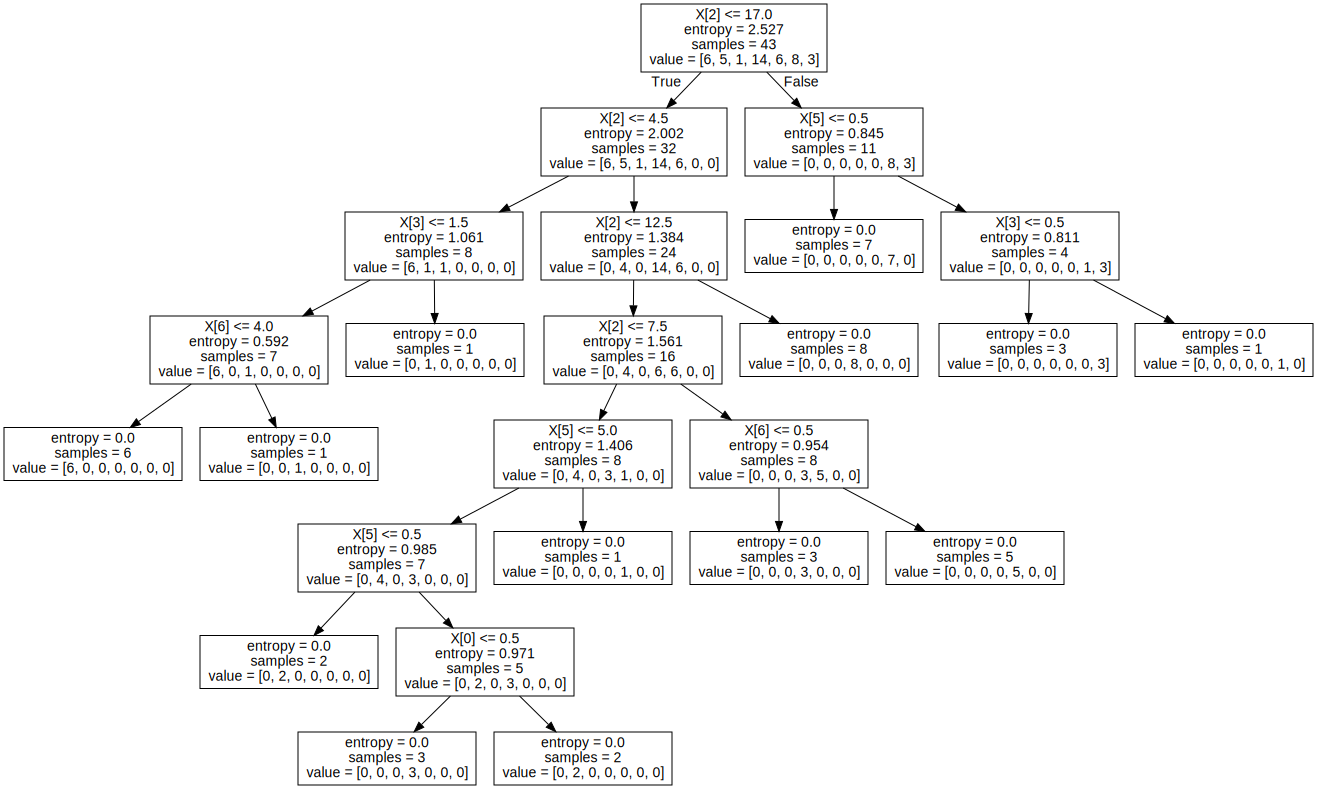

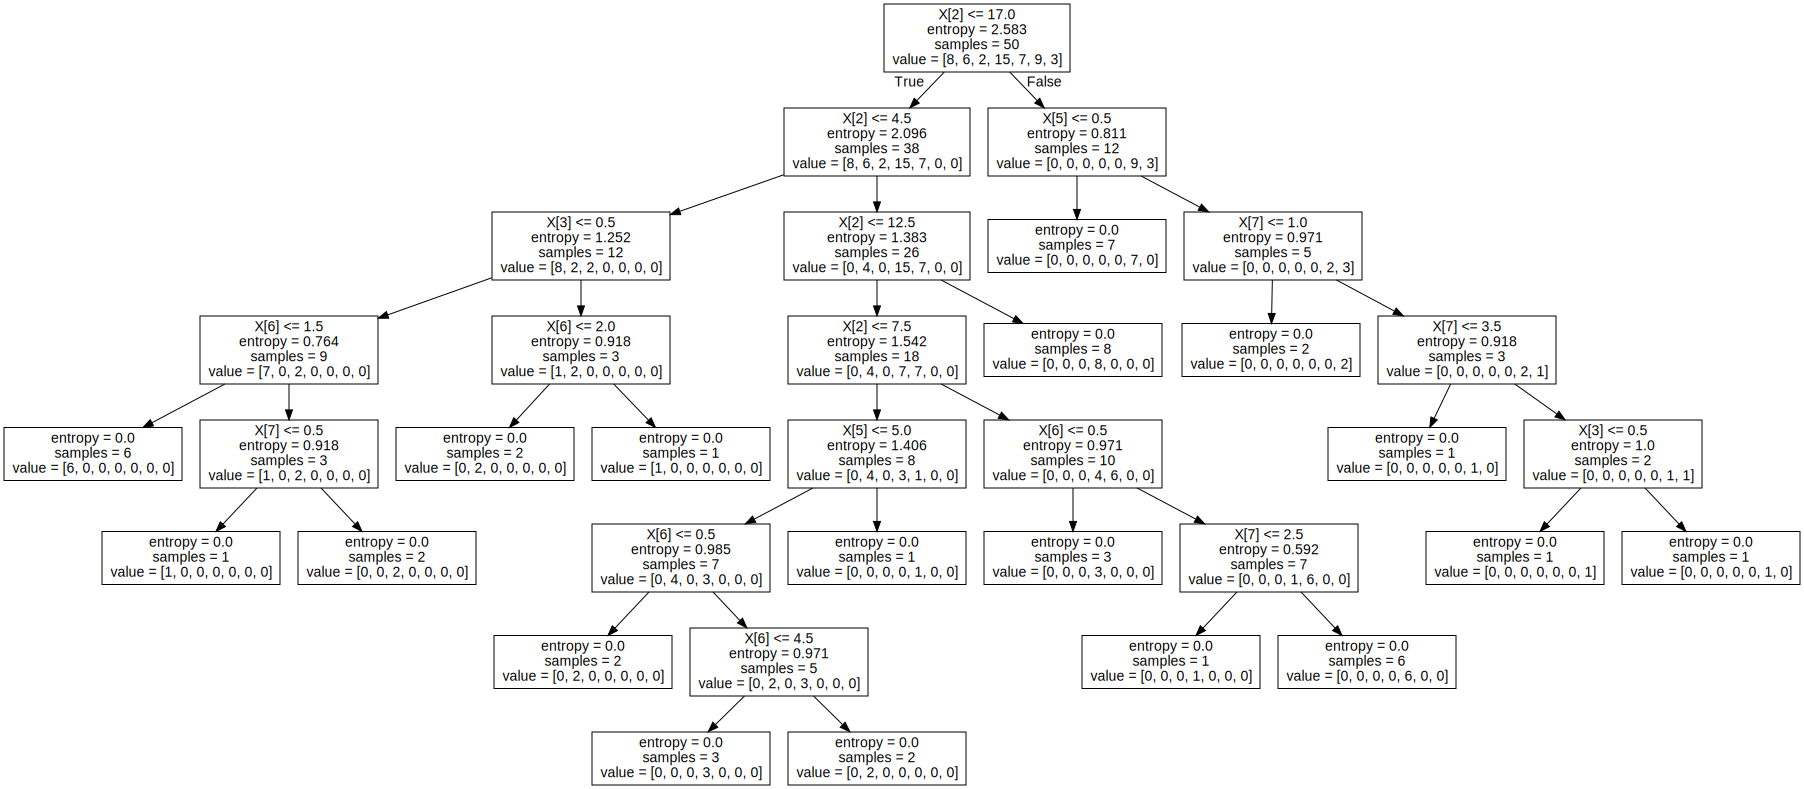

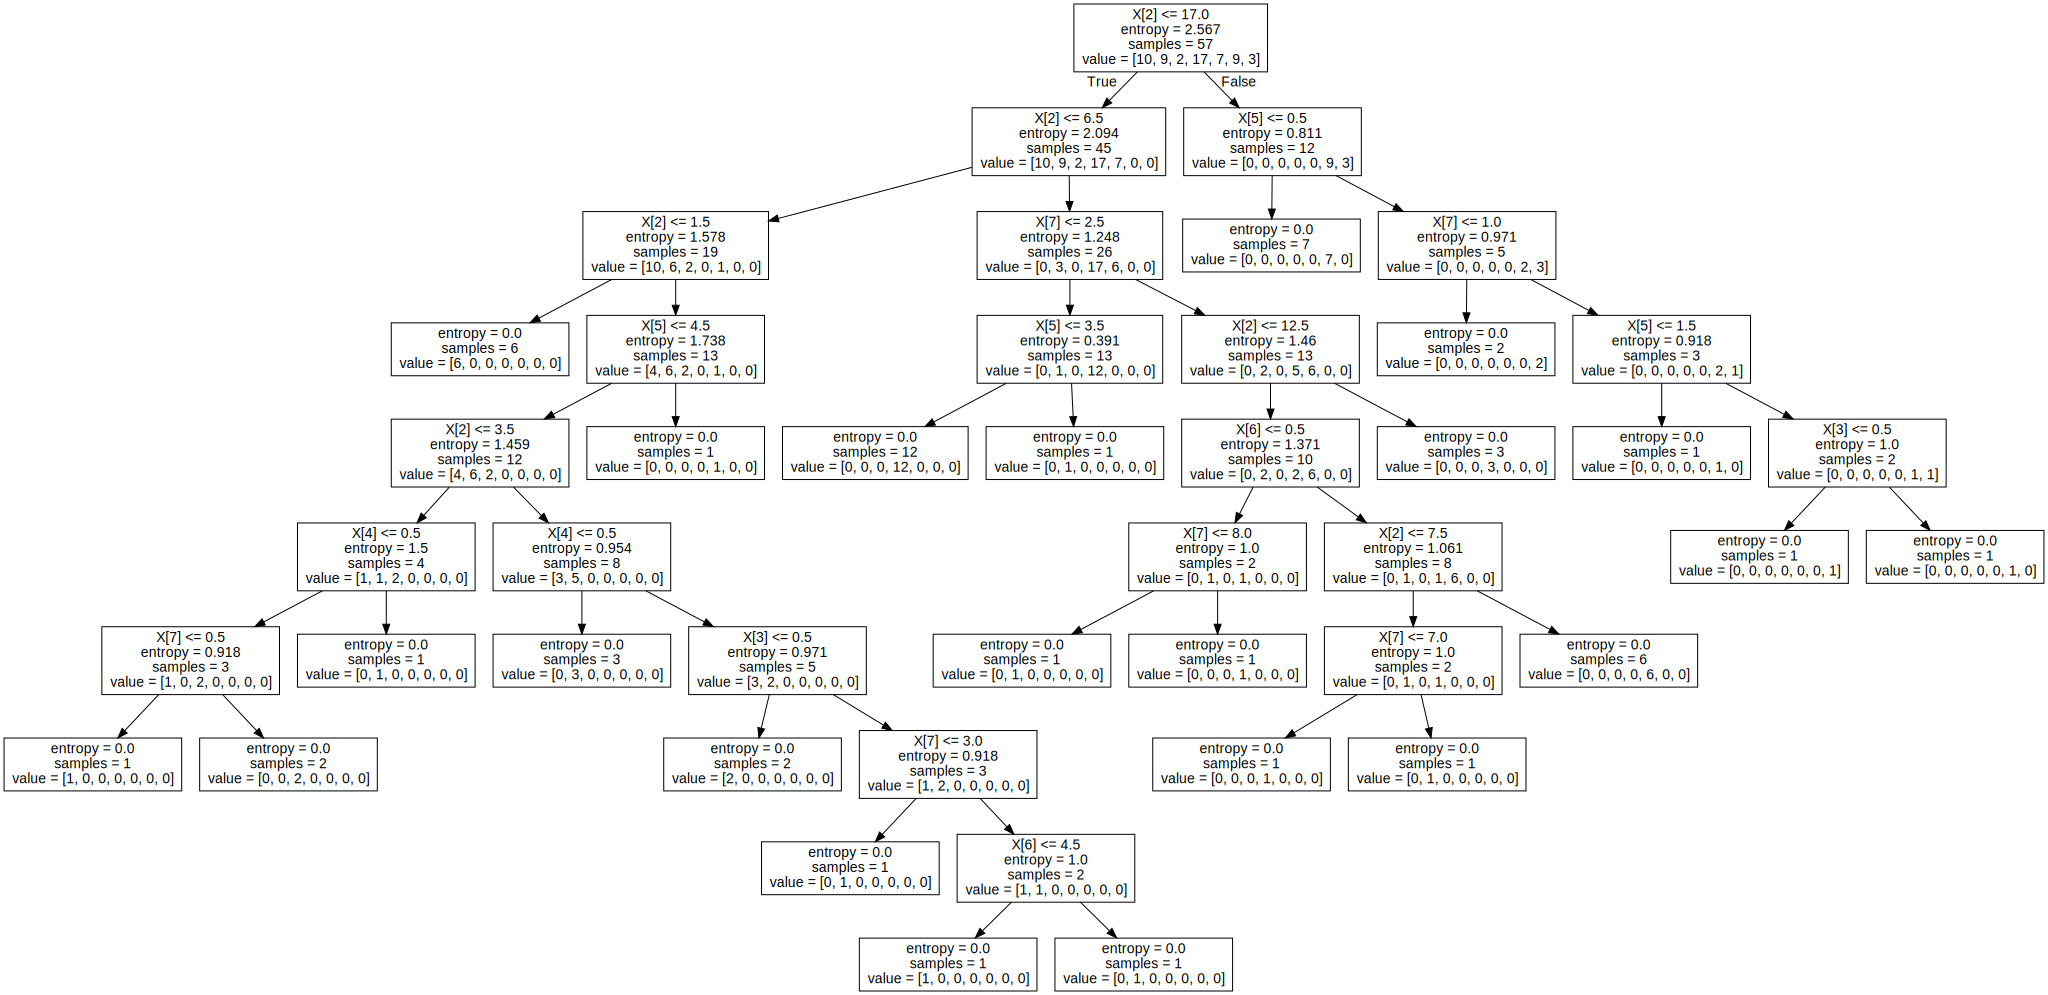

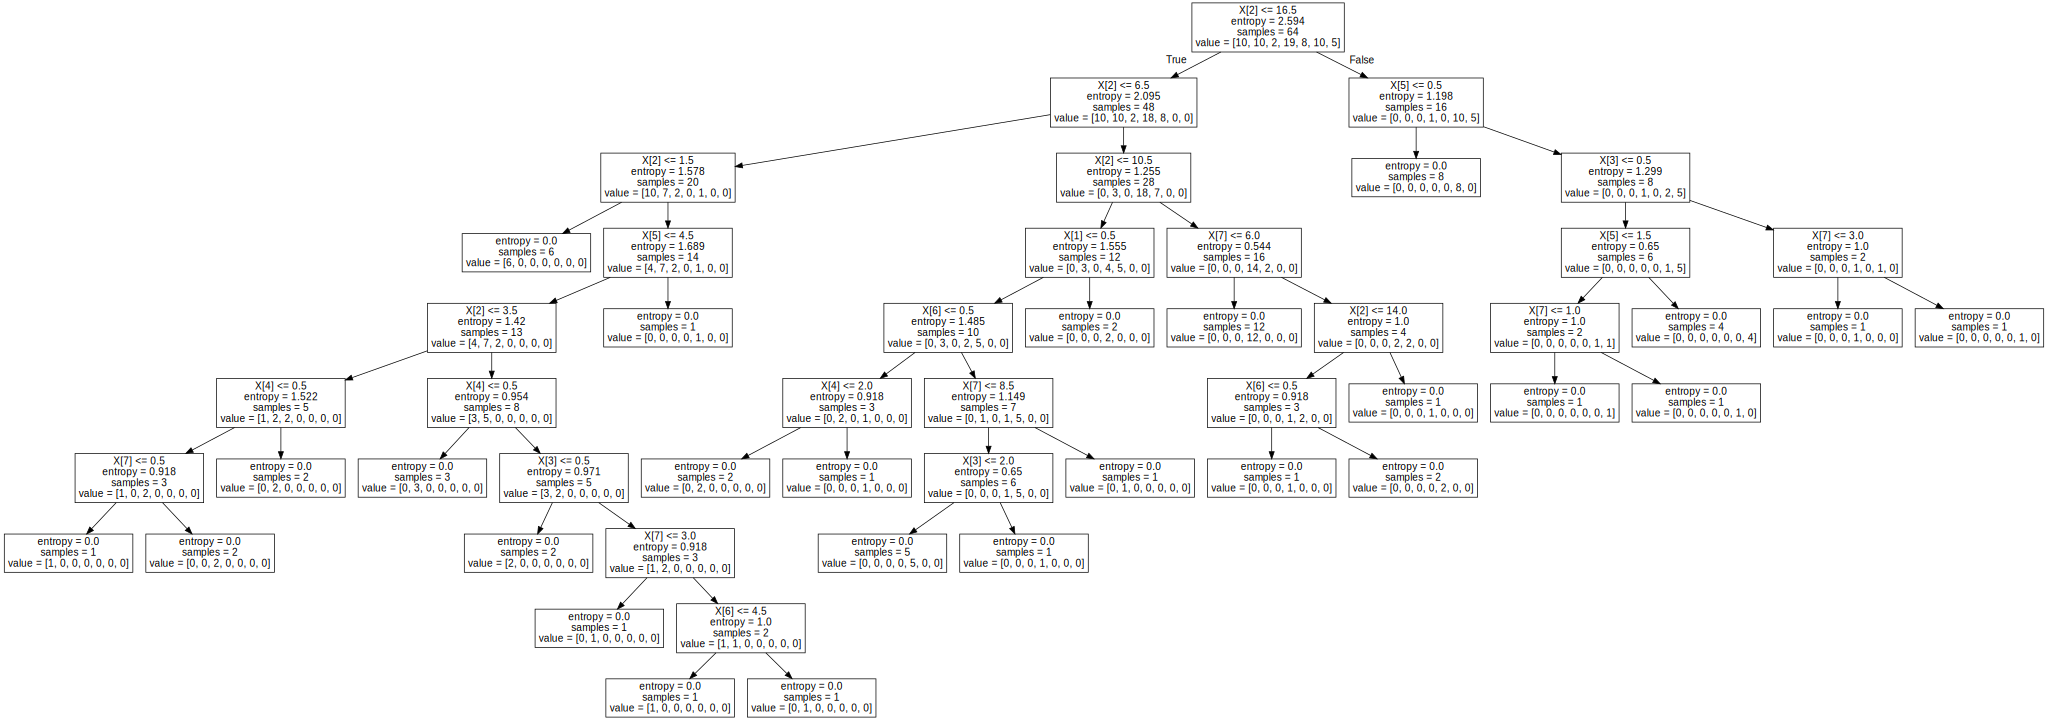

In [76]:
accuracy_tree = []
precision_tree = []
f1_tree = []
recall_tree = []
x = range(60, 91, 10)

for i in x:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=(100-i)/100, random_state=123)

    tree = DecisionTreeClassifier(random_state=1,criterion="entropy")
    tree.fit(X_train, y_train)

    expected = y_test
    predicted = tree.predict(X_test)
    
    accuracy_tree.append(accuracy_score(expected, predicted))
    precision_tree.append(precision_score(expected, predicted, zero_division = 1, average='macro'))
    f1_tree.append(f1_score(expected, predicted, zero_division = 1, average='macro'))
    recall_tree.append(recall_score(expected, predicted, zero_division = 1, average='macro'))
    display(graphviz.Source(export_graphviz(tree, out_file=None)))

Text(0.5, 0, 'Обучающий набор, %')

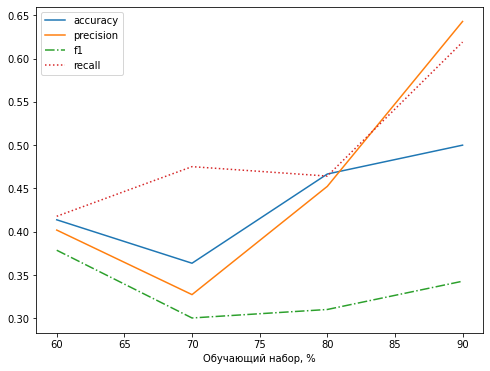

In [77]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.plot(x, accuracy_tree, label = 'accuracy')
ax.plot(x, precision_tree, label = 'precision', linestyle='-')
ax.plot(x, f1_tree, label = 'f1', linestyle='-.')
ax.plot(x, recall_tree, label = 'recall', linestyle=':')
ax.legend()
ax.set_xlabel('Обучающий набор, %')


#  Census Income 

In [100]:
data_adult = pd.read_csv("adult.data.csv")
test_adult = pd.read_csv("adult.test.csv")

In [101]:
for i in data_adult.columns:
    data_adult[i] = LabelEncoder().fit_transform(data_adult[i])
    
for i in test_adult.columns:
    test_adult[i] = LabelEncoder().fit_transform(test_adult[i])

In [102]:
X_train = data_adult[data_adult.columns[:-1]]
y_train = data_adult[data_adult.columns[-1]]

In [103]:
X_test = test_adult[test_adult.columns[:-1]]
y_test = test_adult[test_adult.columns[-1]]

In [104]:
X_test

,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0.1,40,United-States
0,21,4,1888,11,8,2,5,0,4,1,0,0,49,38
1,11,2,11539,7,11,2,11,0,4,1,0,0,39,38
2,27,4,5146,15,9,2,7,0,2,1,90,0,39,38
3,1,0,2450,15,9,4,0,3,4,0,0,0,29,38
4,17,4,7627,0,5,4,8,1,4,1,0,0,29,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16275,22,4,8476,9,12,0,10,1,4,0,0,0,35,38
16276,47,0,11300,11,8,6,0,2,2,1,0,0,39,38
16277,21,4,12013,9,12,2,10,0,4,1,0,0,49,38
16278,27,4,1718,9,12,0,1,3,1,1,75,0,39,38


### Дерево решений

In [105]:
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)

expected = y_test
predicted = tree.predict(X_test)

accuracy_tree_adult = accuracy_score(expected, predicted)
precision_tree_adult = precision_score(expected, predicted, zero_division = 1)
f1_tree_adult = f1_score(expected, predicted, zero_division = 1)
recall_tree_adult = recall_score(expected, predicted, zero_division = 1)

#display(graphviz.Source(export_graphviz(tree, out_file=None)))

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
-  11th
-  Black
-  Machine-op-inspct
-  Own-child
-  Private
- ...
Feature names seen at fit time, yet now missing:
-  0
-  13
-  2174
-  40
-  77516
- ...

  warnings.warn(message, FutureWarning)


In [108]:
print('accuracy = '+str(accuracy_tree_adult))
print('precision = '+str(precision_tree_adult))
print('f1 = '+str(f1_tree_adult))
print('recall = '+str(recall_tree_adult))

accuracy = 0.802027027027027
precision = 0.5809721861190538
f1 = 0.5810477057064863
recall = 0.5811232449297972


### Случайный лес

In [111]:
accuracy_forest = []
precision_forest = []
f1_forest = []
recall_forest = []
x = range(50, 101, 10)

for i in x:
    forest = RandomForestClassifier(n_estimators=i, random_state=0)
    forest.fit(X_train, y_train)

    expected = y_test
    predicted = forest.predict(X_test)
    
    accuracy_forest.append(accuracy_score(expected, predicted))
    precision_forest.append(precision_score(expected, predicted))
    f1_forest.append(f1_score(expected, predicted))
    recall_forest.append(recall_score(expected, predicted))

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
-  11th
-  Black
-  Machine-op-inspct
-  Own-child
-  Private
- ...
Feature names seen at fit time, yet now missing:
-  0
-  13
-  2174
-  40
-  77516
- ...

  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
-  11th
-  Black
-  Machine-op-inspct
-  Own-child
-  Private
- ...
Feature names seen at fit time, yet now missing:
-  0
-  13
-  2174
-  40
-  77516
- ...

  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.

Text(0.5, 0, 'Количество деревьев, шт.')

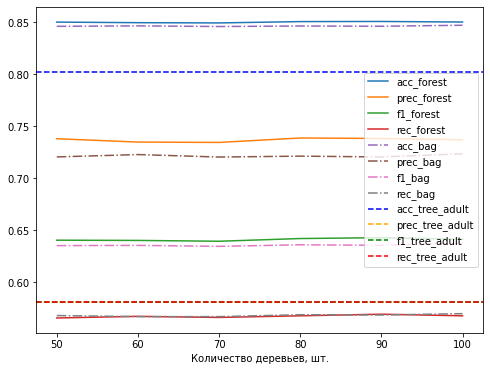

In [112]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.plot(x, accuracy_forest, label = 'acc_forest')
ax.plot(x, precision_forest, label = 'prec_forest')
ax.plot(x, f1_forest, label = 'f1_forest')
ax.plot(x, recall_forest, label = 'rec_forest')

ax.plot(x, accuracy_bagging, label = 'acc_bag', linestyle ='-.')
ax.plot(x, precision_bagging, label = 'prec_bag', linestyle ='-.')
ax.plot(x, f1_bagging, label = 'f1_bag', linestyle ='-.')
ax.plot(x, recall_bagging, label = 'rec_bag', linestyle ='-.')

ax.axhline(y=accuracy_tree_adult, label = 'acc_tree_adult', color = 'blue', linestyle='--')
ax.axhline(y=precision_tree_adult, label = 'prec_tree_adult', color = 'orange', linestyle='--')
ax.axhline(y=f1_tree_adult, label = 'f1_tree_adult', color = 'green', linestyle='--')
ax.axhline(y=recall_tree_adult, label = 'rec_tree_adult', color = 'red', linestyle='--')
ax.legend()
ax.set_xlabel('Количество деревьев, шт.')
